# Лабораторная работа № 1

In [64]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Выбор и описание данных

В ходе лабораторной работы анализируется датасет "Predict students' dropout and academic success". В наборе данных представлена информация о студентах на таких направлениях как агрономия, дизайн, образование, сестринское дело, журналистика, менеджмент, социальное обслуживание и технологии. Цель сбора данных – предсказать отсев студентов и их академическую успеваемость. 

Исследование с этими данными : http://www.worldcist.org/2021/
(By Mónica V. Martins, Daniel Tolledo, Jorge Machado, Luís M. T. Baptista, and Valentim Realinho. 2021, Published in Trends and Applications in Information Systems and Technologies)

In [65]:
bank = pd.read_csv("data.csv",sep=';')
# bank = pd.DataFrame(t)
bank.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [66]:
#так как все данные представлены числами, переведем столбцы с качественными показателями в тип данных объект 
bank["Marital status"] = bank["Marital status"].astype(object)
bank["Application mode"] = bank["Application mode"].astype(object)
# bank["Application order"] = bank["Application order"].astype(object)
bank["Course"] = bank["Course"].astype(object)
bank["Daytime/evening attendance\t"] = bank["Daytime/evening attendance\t"].astype(object)
bank["Previous qualification"] = bank["Previous qualification"].astype(object)
bank["Nacionality"] = bank["Nacionality"].astype(object)
bank["Mother's qualification"] = bank["Mother's qualification"].astype(object)
bank["Father's qualification"] = bank["Father's qualification"].astype(object)
bank["Mother's occupation"] = bank["Mother's occupation"].astype(object)
bank["Father's occupation"] = bank["Father's occupation"].astype(object)
bank["Displaced"] = bank["Displaced"].astype(object)
bank["Educational special needs"] = bank["Educational special needs"].astype(object)
bank["Debtor"] = bank["Debtor"].astype(object)
bank["Tuition fees up to date"] = bank["Tuition fees up to date"].astype(object)
bank["Gender"] = bank["Gender"].astype(object)
bank["Scholarship holder"] = bank["Scholarship holder"].astype(object)
bank["International"] = bank["International"].astype(object)
bank["Target"] = bank["Target"].astype(object)

Датасет содержит информацию о 4424 студентах. Последние атрибут - выходной, отвечает на вопрос "отчислится ли студент?"

## 2. Описание показателей.

In [67]:
#Функция для описания количественных показателей
def Inputs_info(data):
    print("Информация об", data.name)
    print ("{:<9} {:<9} {:<11} {:<17}".format('min','max','median','mean'))
    print ("{:<9} {:<9} {:<11} {:<17}".format(data.min(), data.max(), data.median(), data.mean()))

### 1) Marital status - материальный статус студента (порядковая шкала)

In [68]:
bank['Marital status'].value_counts()

1    3919
2     379
4      91
5      25
6       6
3       4
Name: Marital status, dtype: int64

### 2) Application mode - причина поступления (номинальная шкала)

In [69]:
bank['Application mode'].value_counts()

1     1708
17     872
39     785
43     312
44     213
7      139
18     124
42      77
51      59
16      38
53      35
15      30
5       16
10      10
2        3
57       1
26       1
27       1
Name: Application mode, dtype: int64

### 3) Application order - приоритет выбора (порядковая шкала)

In [70]:
bank['Application order'].value_counts()

1    3026
2     547
3     309
4     249
5     154
6     137
9       1
0       1
Name: Application order, dtype: int64

### 4) Course - номер специальности (номинальная шкала)

In [71]:
bank['Course'].value_counts()

9500    766
9147    380
9238    355
9085    337
9773    331
9670    268
9991    268
9254    252
9070    226
171     215
8014    215
9003    210
9853    192
9119    170
9130    141
9556     86
33       12
Name: Course, dtype: int64

### 5) Daytime/evening attendance	 - время обучения днем/вечером (номинальная шкала)

In [72]:
bank["Daytime/evening attendance\t"].value_counts()

1    3941
0     483
Name: Daytime/evening attendance\t, dtype: int64

### 6) Previous qualification - предыдущее образование (порядковая шкала)

In [73]:
bank['Previous qualification'].value_counts()

1     3717
39     219
19     162
3      126
12      45
40      40
42      36
2       23
6       16
9       11
4        8
38       7
43       6
10       4
15       2
5        1
14       1
Name: Previous qualification, dtype: int64

### 7) Previous qualification (grade) - уровень предыдущего образования (интервальная шкала)

In [74]:
Inputs_info(bank['Previous qualification (grade)'])

Информация об Previous qualification (grade)
min       max       median      mean             
95.0      190.0     133.1       132.6133137432188


### 8) Nacionality - национальность (номинальная шкала)

In [75]:
bank['Nacionality'].value_counts()

1      4314
41       38
26       14
22       13
6        13
24        5
100       3
11        3
103       3
21        2
101       2
62        2
25        2
2         2
105       2
32        1
13        1
109       1
108       1
14        1
17        1
Name: Nacionality, dtype: int64

### 9) Mother's qualification - образование матери (порядковая шкала)

In [76]:
bank["Mother's qualification"].value_counts()

1     1069
37    1009
19     953
38     562
3      438
34     130
2       83
4       49
12      42
5       21
40       9
9        8
39       8
41       6
6        4
42       4
43       4
29       3
10       3
11       3
36       3
35       3
30       3
14       2
18       1
22       1
27       1
26       1
44       1
Name: Mother's qualification, dtype: int64

### 10) Father's qualification - образование отца (порядковая шкала)

In [77]:
bank["Father's qualification"].value_counts()

37    1209
19     968
1      904
38     702
3      282
34     112
2       68
4       39
12      38
39      20
5       18
11      10
36       8
9        5
40       5
22       4
30       4
14       4
29       3
35       2
41       2
43       2
10       2
6        2
26       2
25       1
27       1
33       1
44       1
20       1
42       1
18       1
13       1
31       1
Name: Father's qualification, dtype: int64

### 11) Mother's occupation - занятость матери (номинальная шкала)

In [78]:
bank["Mother's occupation"].value_counts()

9      1577
4       817
5       530
3       351
2       318
7       272
0       144
1       102
6        91
90       70
8        36
191      26
99       17
194      11
141       8
123       7
144       6
175       5
192       5
193       4
134       4
10        4
143       3
151       3
132       3
152       2
122       2
153       2
173       1
125       1
131       1
171       1
Name: Mother's occupation, dtype: int64

### 12) Father's occupation - занятость отца (номинальная шкала)

In [79]:
bank["Father's occupation"].value_counts()

9      1010
7       666
5       516
4       386
3       384
8       318
10      266
6       242
2       197
1       134
0       128
90       65
99       19
193      15
144       8
171       8
192       6
163       5
103       4
175       4
135       3
183       3
152       3
123       3
181       3
194       2
182       2
112       2
151       2
172       2
122       2
102       2
153       1
101       1
114       1
174       1
141       1
132       1
134       1
143       1
131       1
161       1
195       1
121       1
124       1
154       1
Name: Father's occupation, dtype: int64

### 13) Admission grade - вступительный балл (интервальная шкала)

In [80]:
Inputs_info(bank['Admission grade'])

Информация об Admission grade
min       max       median      mean             
95.0      190.0     126.1       126.97811934900544


### 14) Displaced - переезд (номинальная шкала)

In [81]:
bank["Displaced"].value_counts()

1    2426
0    1998
Name: Displaced, dtype: int64

### 15) Educational special needs - особые потребности (номинальная шкала)

In [82]:
bank["Educational special needs"].value_counts()

0    4373
1      51
Name: Educational special needs, dtype: int64

### 16) Debtor - должник (номинальная шкала)

In [83]:
bank["Debtor"].value_counts()

0    3921
1     503
Name: Debtor, dtype: int64

### 17) Tuition fees up to date - плата за обучение (номинальная шкала)

In [84]:
bank["Tuition fees up to date"].value_counts()

1    3896
0     528
Name: Tuition fees up to date, dtype: int64

### 18) Gender - пол (номинальная шкала)

In [85]:
bank["Gender"].value_counts()

0    2868
1    1556
Name: Gender, dtype: int64

### 19) Scholarship holder - получает стипендию (номинальная шкала)

In [86]:
bank["Scholarship holder"].value_counts()

0    3325
1    1099
Name: Scholarship holder, dtype: int64

### 20) Age at enrollment - возраст при зачислении (абсолютная шкала)

In [87]:
Inputs_info(bank['Age at enrollment'])

Информация об Age at enrollment
min       max       median      mean             
17        70        20.0        23.265144665461122


### 21) International - иностранец (номинальная шкала)

In [88]:
bank["International"].value_counts()

0    4314
1     110
Name: International, dtype: int64

### 22) Curricular units 1st sem (credited) - количество зачетных единиц в 1 семестре (интервальная шкала)

In [89]:
Inputs_info(bank['Curricular units 1st sem (credited)'])

Информация об Curricular units 1st sem (credited)
min       max       median      mean             
0         20        0.0         0.7099909584086799


### 23) Curricular units 1st sem (enrolled) - количество учебных занятий, на которые студент был записан (интервальная шкала)

In [90]:
Inputs_info(bank['Curricular units 1st sem (enrolled)'])

Информация об Curricular units 1st sem (enrolled)
min       max       median      mean             
0         26        6.0         6.2705696202531644


### 24) Curricular units 1st sem (evaluations) - количество учебных занятий с оценкой (интервальная шкала)

In [91]:
Inputs_info(bank['Curricular units 1st sem (evaluations)'])

Информация об Curricular units 1st sem (evaluations)
min       max       median      mean             
0         45        8.0         8.299050632911392


### 25) Curricular units 1st sem (approved) - количество утвержденных предметов (интервальная шкала)

In [92]:
Inputs_info(bank['Curricular units 1st sem (approved)'])

Информация об Curricular units 1st sem (approved)
min       max       median      mean             
0         26        5.0         4.706600361663653


### 26) Curricular units 1st sem (grade) - средний балл за первый семестр (интервальная шкала)

In [93]:
Inputs_info(bank['Curricular units 1st sem (grade)'])

Информация об Curricular units 1st sem (grade)
min       max       median      mean             
0.0       18.875    12.285714285714286 10.640821575154185


### 27) Curricular units 1st sem (without evaluations) - количество учебных занятий без оценки (интервальная шкала)

In [94]:
Inputs_info(bank['Curricular units 1st sem (without evaluations)'])

Информация об Curricular units 1st sem (without evaluations)
min       max       median      mean             
0         12        0.0         0.13765822784810128


### 28) Curricular units 2nd sem (credited) - количество зачетных единиц в 2 семестре (интервальная шкала)

In [95]:
Inputs_info(bank['Curricular units 2nd sem (credited)'])

Информация об Curricular units 2nd sem (credited)
min       max       median      mean             
0         19        0.0         0.5418173598553345


### 29) Curricular units 2nd sem (enrolled) - количество учебных занятий, на которые студент был записан (интервальная шкала)

In [96]:
Inputs_info(bank['Curricular units 2nd sem (enrolled)'])

Информация об Curricular units 2nd sem (enrolled)
min       max       median      mean             
0         23        6.0         6.232142857142857


### 30) Curricular units 2nd sem (evaluations) - количество учебных занятий с оценкой (интервальная шкала)

In [97]:
Inputs_info(bank['Curricular units 2nd sem (evaluations)'])

Информация об Curricular units 2nd sem (evaluations)
min       max       median      mean             
0         33        8.0         8.063291139240507


### 31) Curricular units 2nd sem (approved) - количество утвержденных предметов (интервальная шкала)

In [98]:
Inputs_info(bank['Curricular units 2nd sem (approved)'])

Информация об Curricular units 2nd sem (approved)
min       max       median      mean             
0         20        5.0         4.435804701627487


### 32) Curricular units 2nd sem (grade) - средний балл за первый семестр (интервальная шкала)

In [99]:
Inputs_info(bank['Curricular units 2nd sem (grade)'])

Информация об Curricular units 2nd sem (grade)
min       max       median      mean             
0.0       18.571428571428573 12.2        10.230205722716985


### 33) Curricular units 2nd sem (without evaluations) - количество учебных занятий без оценки (интервальная шкала)

In [100]:
Inputs_info(bank['Curricular units 2nd sem (without evaluations)'])

Информация об Curricular units 2nd sem (without evaluations)
min       max       median      mean             
0         12        0.0         0.15031645569620253


### 34) Unemployment rate - уровень безработицы (абсолютная шкала)

In [101]:
Inputs_info(bank['Unemployment rate'])

Информация об Unemployment rate
min       max       median      mean             
7.6       16.2      11.1        11.56613924050633


### 35) Inflation rate - уровень инфляции (интервальная шкала)

In [102]:
Inputs_info(bank['Inflation rate'])

Информация об Inflation rate
min       max       median      mean             
-0.8      3.7       1.4         1.228028933092224


### 36) GDP - ВВП (интервальная шкала)

In [103]:
Inputs_info(bank['GDP'])

Информация об GDP
min       max       median      mean             
-4.06     3.51      0.32        0.001968806509945778


### 37) Target - отчислен, продолжет обучение, выпуск (номинальная шкала)

In [104]:
bank["Target"].value_counts()

Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64

## 3. Визуализация для отдельных показателей.

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

### Количественные показатели

#### Для показателя Age at enrollment

<Axes: xlabel='Age at enrollment', ylabel='Count'>

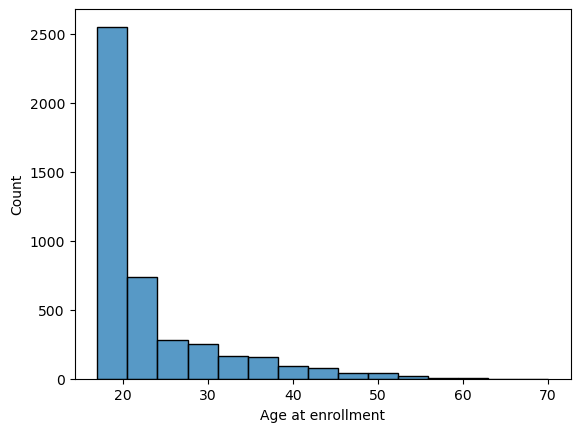

In [106]:
sns.histplot(x='Age at enrollment',data=bank, bins=15)

#### Для показателя Admission grade

<Axes: xlabel='Admission grade', ylabel='Count'>

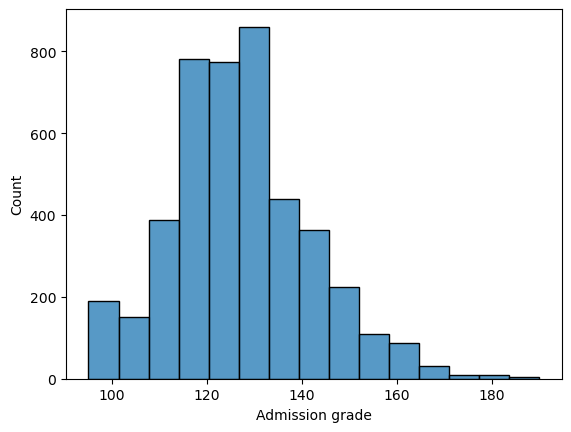

In [107]:
sns.histplot(x="Admission grade",data=bank, bins=15)

#### Для показателя Previous qualification (grade)

<Axes: xlabel='Previous qualification (grade)', ylabel='Count'>

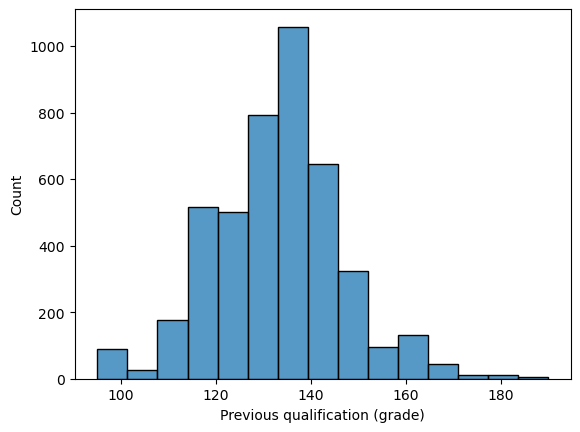

In [108]:
sns.histplot(x="Previous qualification (grade)",data=bank, bins=15)

### Качественные показатели

#### Для показателя Course

<Axes: xlabel='Course', ylabel='count'>

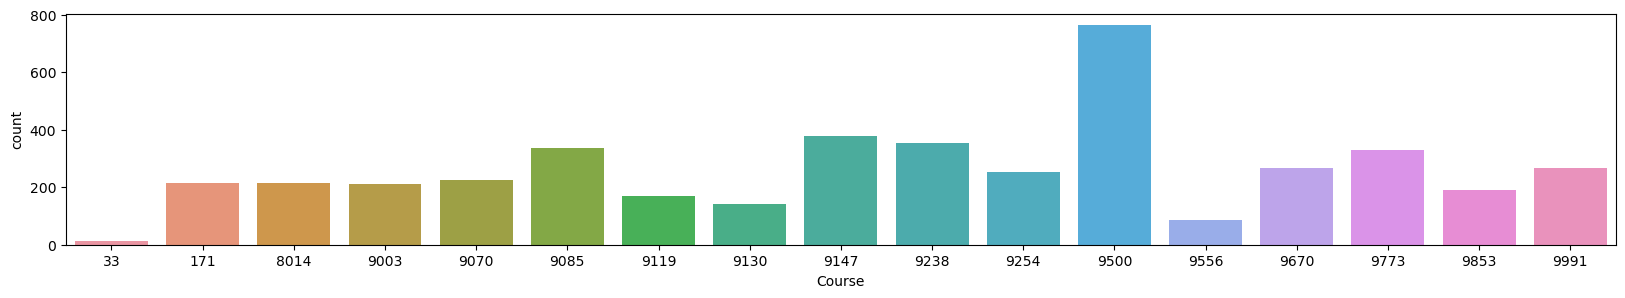

In [109]:
fig = plt.figure(figsize = (20, 3))
sns.countplot(x='Course',data=bank)

#### Для показателя Nacionality

<Axes: xlabel='Nacionality', ylabel='count'>

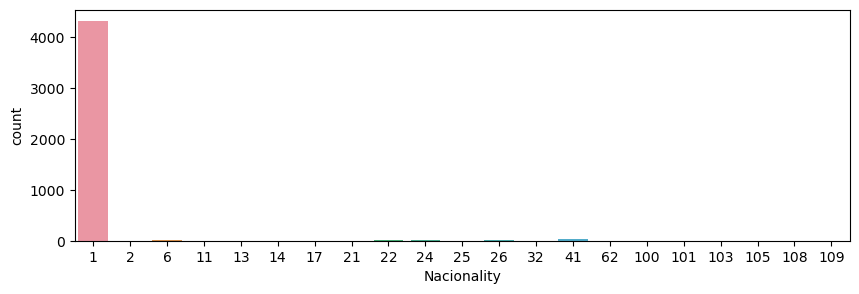

In [110]:
fig = plt.figure(figsize = (10, 3))
sns.countplot(x='Nacionality',data=bank)

#### Для показателя Application mode

<Axes: xlabel='Application mode', ylabel='count'>

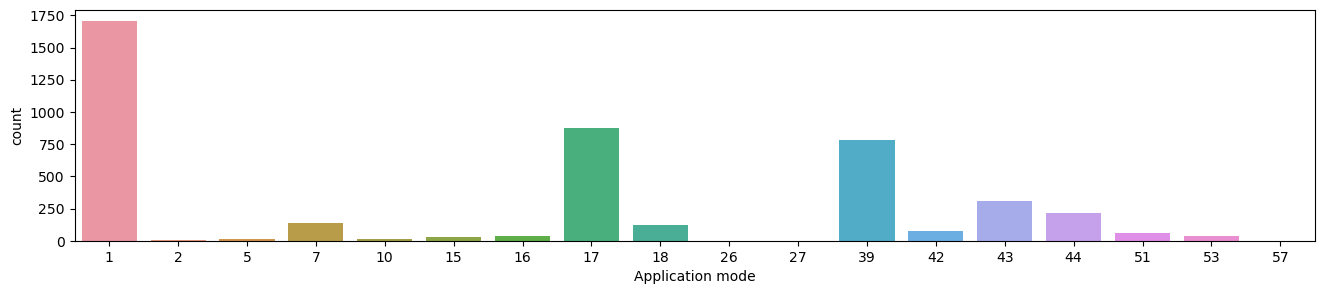

In [111]:
fig = plt.figure(figsize = (16, 3))
sns.countplot(x='Application mode',data=bank)

## 4. Группировка объектов.

Группировать было принято решение отталкиваясь от последнего столбца с данными о статусе студента. Сравниваться будут два показателя: Dropout (отчислен), Enrolled (продолжает обучение). Целью данной групировки является найти факторы наиболее влияющие на статус студента. 

In [112]:
dropout = bank[bank['Target'] == 'Dropout'].select_dtypes(exclude="object").describe()
dropout

,Application order,Previous qualification (grade),Admission grade,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000
mean,1.593244,131.114075,124.961365,26.068966,0.609430,5.821253,7.751583,2.551724,7.256656,0.192118,0.449683,5.780436,7.173821,1.940183,5.899339,0.237861,11.616397,1.283955,-0.150859
std,1.215769,12.873354,15.125159,8.704024,2.104695,2.326304,4.921590,2.857588,6.031120,0.794591,1.679548,2.108249,4.817374,2.573691,6.118740,0.994210,2.768259,1.404970,2.251768
min,1.000000,95.000000,95.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,122.000000,115.000000,19.000000,0.000000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000,5.000000,5.000000,0.000000,0.000000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,133.100000,123.600000,23.000000,0.000000,6.000000,8.000000,2.000000,10.928571,0.000000,0.000000,6.000000,7.000000,0.000000,0.000000,0.000000,11.100000,1.400000,0.320000
75%,2.000000,137.000000,133.000000,30.000000,0.000000,6.000000,11.000000,4.000000,12.200000,0.000000,0.000000,6.000000,10.000000,4.000000,11.833333,0.000000,13.900000,2.600000,1.740000
max,6.000000,190.000000,190.000000,70.000000,18.000000,21.000000,31.000000,21.000000,18.000000,8.000000,16.000000,18.000000,25.000000,16.000000,17.714286,12.000000,16.200000,3.700000,3.510000


In [113]:
enrolled = bank[bank['Target'] == 'Enrolled'].select_dtypes(exclude="object").describe()
enrolled

,Application order,Previous qualification (grade),Admission grade,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000
mean,1.625945,131.208438,125.534257,22.369018,0.507557,5.964736,9.341310,4.318640,11.125257,0.177582,0.358942,5.938287,9.435768,4.057935,11.117364,0.187657,11.272544,1.211713,0.053287
std,1.213577,12.872111,13.792559,6.302672,1.715758,1.987671,3.463465,2.289398,3.675084,0.741459,1.329034,1.831480,3.566558,2.180197,3.601240,0.780467,2.628139,1.373355,2.315631
min,1.000000,96.000000,95.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,123.000000,117.000000,19.000000,0.000000,5.000000,7.000000,3.000000,11.000000,0.000000,0.000000,5.000000,8.000000,3.000000,11.000000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,130.000000,124.100000,20.000000,0.000000,6.000000,9.000000,5.000000,12.000000,0.000000,0.000000,6.000000,9.000000,4.000000,12.000000,0.000000,11.100000,1.400000,0.320000
75%,2.000000,139.000000,133.275000,23.000000,0.000000,6.000000,11.000000,6.000000,12.857143,0.000000,0.000000,6.000000,11.000000,5.000000,12.818182,0.000000,12.700000,2.600000,1.790000
max,9.000000,190.000000,190.000000,54.000000,14.000000,17.000000,24.000000,15.000000,17.000000,8.000000,12.000000,17.000000,28.000000,12.000000,17.600000,8.000000,16.200000,3.700000,3.510000


In [114]:
dif = dropout.loc['mean'] - enrolled.loc['mean']
dif.abs()

Application order                                 0.032700
Previous qualification (grade)                    0.094364
Admission grade                                   0.572892
Age at enrollment                                 3.699948
Curricular units 1st sem (credited)               0.101873
Curricular units 1st sem (enrolled)               0.143483
Curricular units 1st sem (evaluations)            1.589726
Curricular units 1st sem (approved)               1.766916
Curricular units 1st sem (grade)                  3.868602
Curricular units 1st sem (without evaluations)    0.014536
Curricular units 2nd sem (credited)               0.090741
Curricular units 2nd sem (enrolled)               0.157851
Curricular units 2nd sem (evaluations)            2.261947
Curricular units 2nd sem (approved)               2.117752
Curricular units 2nd sem (grade)                  5.218025
Curricular units 2nd sem (without evaluations)    0.050203
Unemployment rate                                 0.3438

Показатель, который имеет наибольшую разницу в средних значениях для групп это - Curricular units 2nd sem (grade). 

<Axes: title={'center': 'Curricular units 2nd sem (grade)'}, xlabel='Target'>

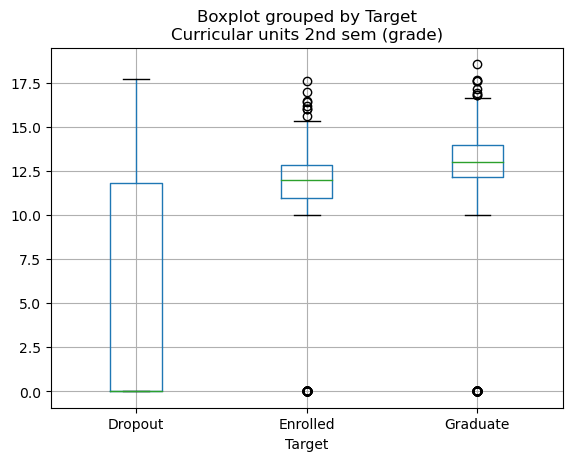

In [115]:
bank.boxplot(column=['Curricular units 2nd sem (grade)'], by='Target')

In [116]:
dropout_categorial = bank[bank["Target"] == "Dropout"].select_dtypes(include="object")
dropout_categorial

,Marital status,Application mode,Course,Daytime/evening attendance\t,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,International,Target
0,1,17,171,1,1,1,19,12,5,9,1,0,0,1,1,0,0,Dropout
2,1,1,9070,1,1,1,37,37,9,9,1,0,0,0,1,0,0,Dropout
7,1,18,9254,1,1,1,37,37,9,9,1,0,0,0,1,0,0,Dropout
9,1,1,9238,1,1,1,1,19,4,7,1,0,1,0,0,0,0,Dropout
12,1,1,9853,1,1,1,19,37,4,9,1,0,0,1,0,0,0,Dropout
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4408,2,39,9773,1,1,1,37,37,9,9,0,0,0,1,1,0,0,Dropout
4411,1,44,9130,1,39,1,37,37,9,3,1,0,0,1,1,0,0,Dropout
4415,4,39,9500,1,19,1,37,37,6,6,0,0,1,0,0,0,0,Dropout
4420,1,1,9773,1,1,105,1,1,9,9,1,0,1,0,0,0,1,Dropout


In [117]:
enrolled_categorial = bank[bank["Target"] == "Enrolled"].select_dtypes(include="object")
enrolled_categorial

,Marital status,Application mode,Course,Daytime/evening attendance\t,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,International,Target
16,1,18,9238,1,1,1,19,38,5,8,1,0,0,1,0,0,0,Enrolled
19,1,1,9853,1,1,1,19,19,7,7,1,0,0,1,0,0,0,Enrolled
21,1,18,9556,1,1,1,1,38,4,7,1,0,0,1,0,0,0,Enrolled
25,1,1,9238,1,1,1,19,38,9,9,1,0,1,1,0,1,0,Enrolled
27,1,1,9085,1,1,1,19,19,3,3,1,0,0,1,0,0,0,Enrolled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4397,1,5,9853,1,1,1,3,38,3,8,1,0,0,1,0,0,0,Enrolled
4402,1,18,9853,1,1,1,1,19,3,9,1,0,0,1,1,0,0,Enrolled
4406,1,1,9070,1,1,1,1,38,5,7,1,0,0,1,1,0,0,Enrolled
4412,1,43,9070,1,1,1,19,19,7,8,1,0,0,1,1,1,0,Enrolled


/Users/tainazitina/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)


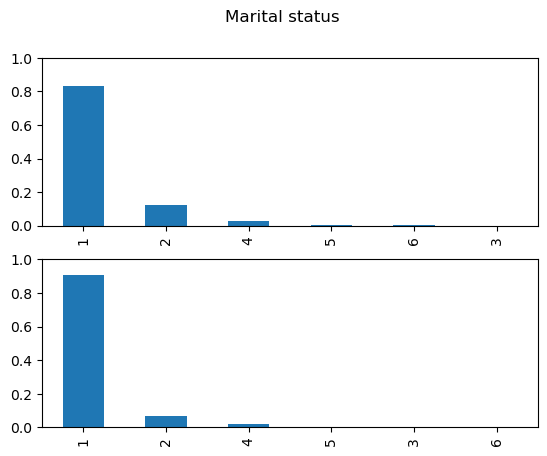

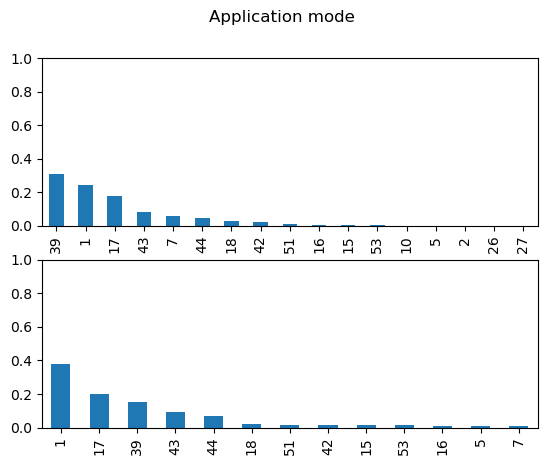

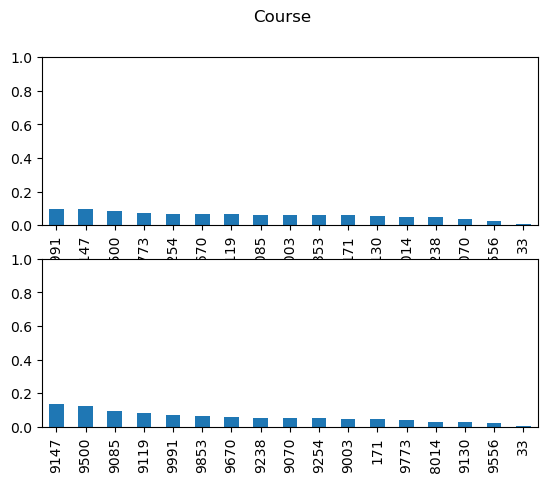

/Users/tainazitina/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


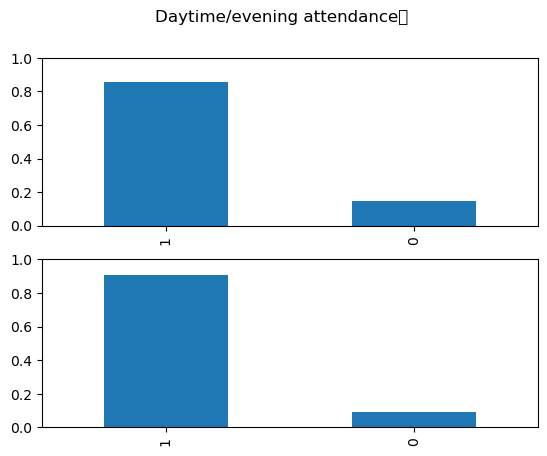

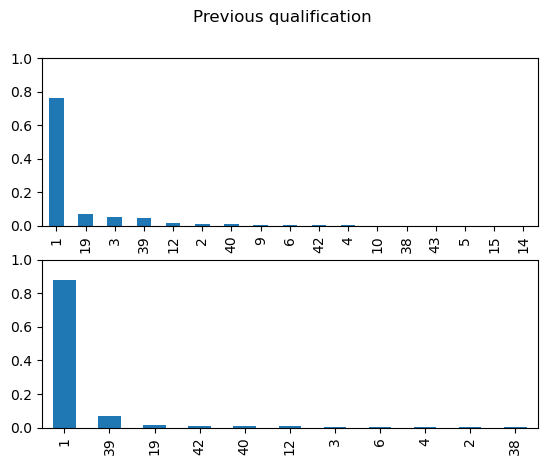

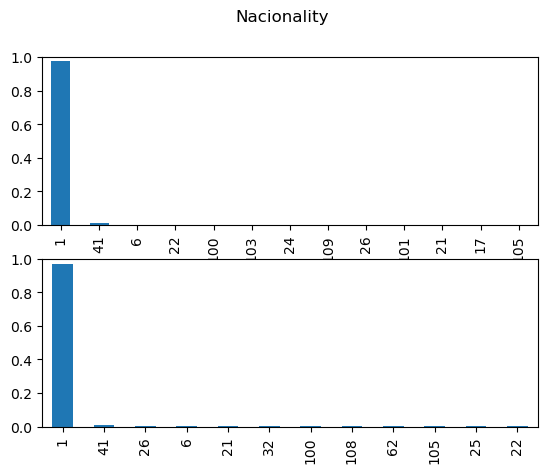

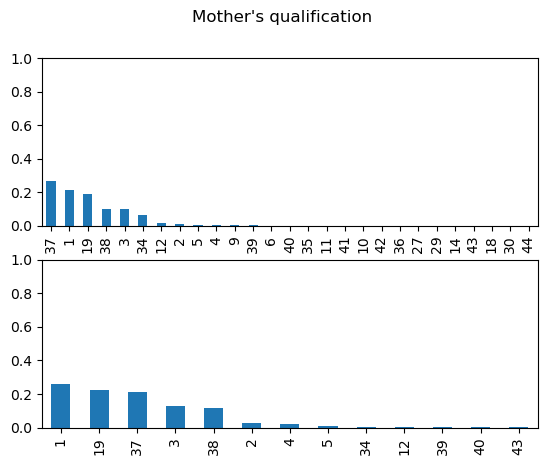

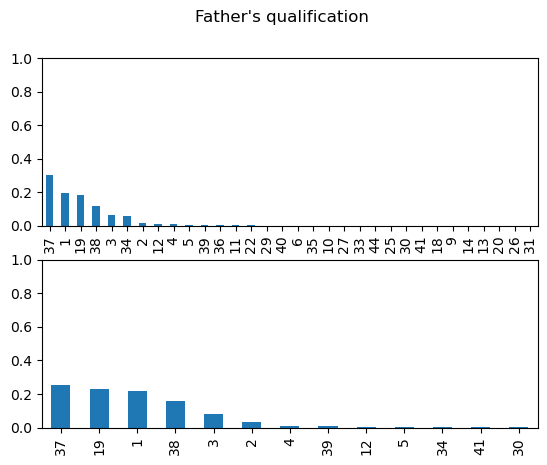

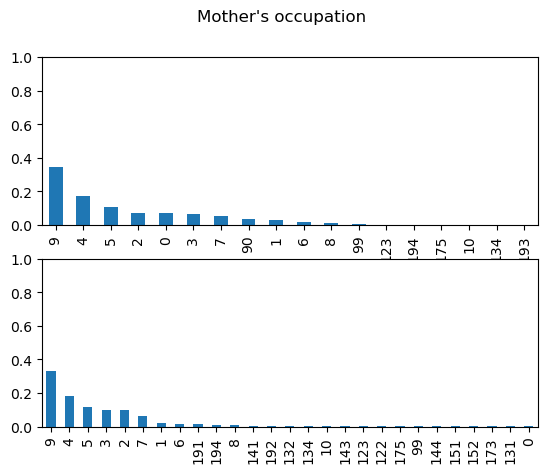

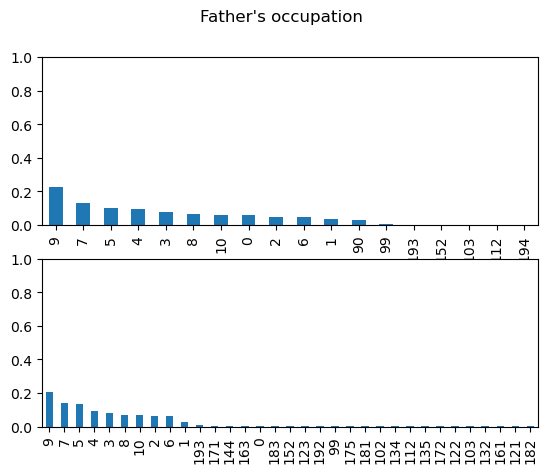

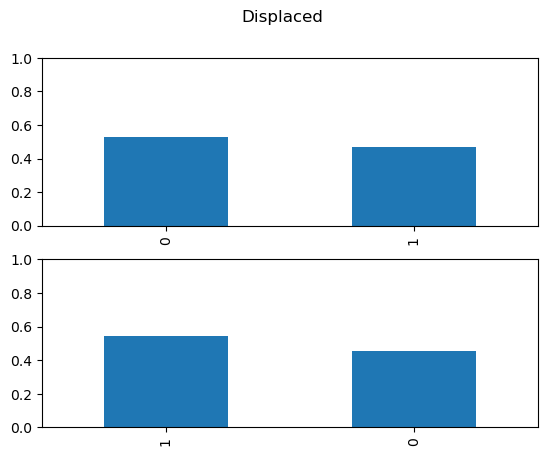

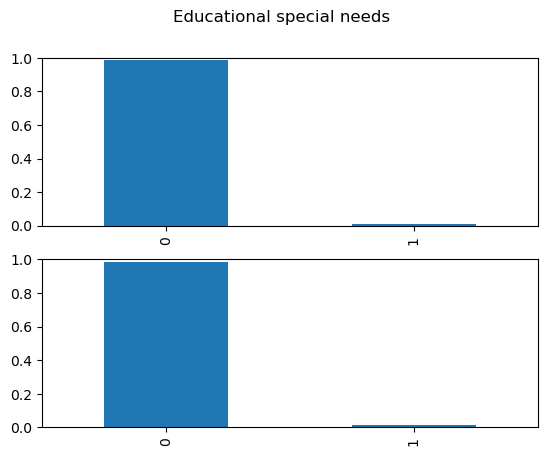

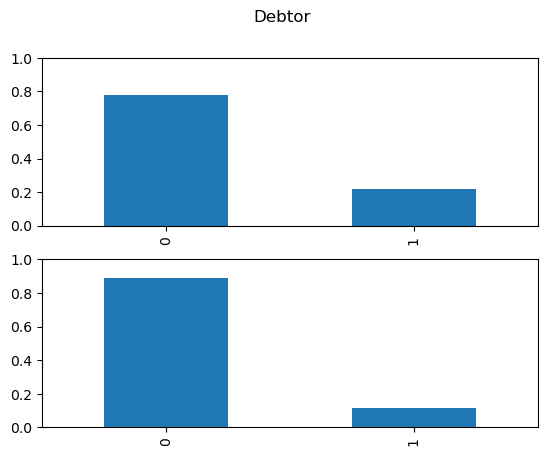

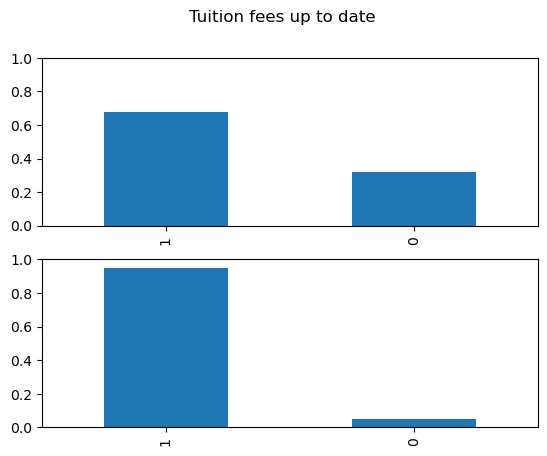

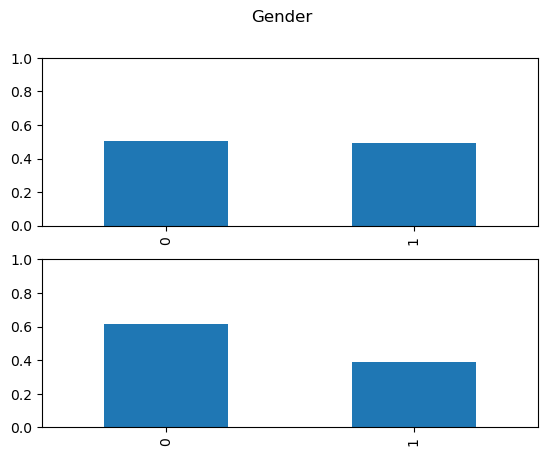

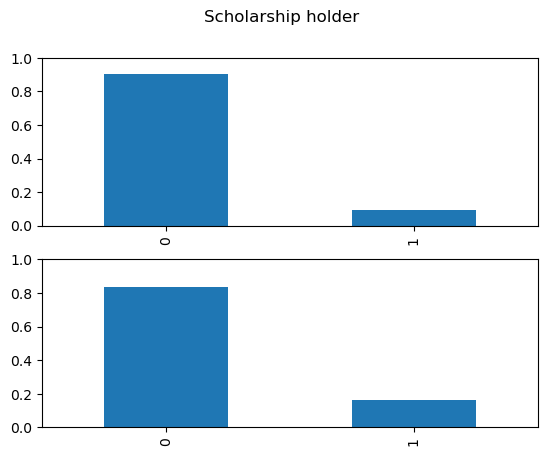

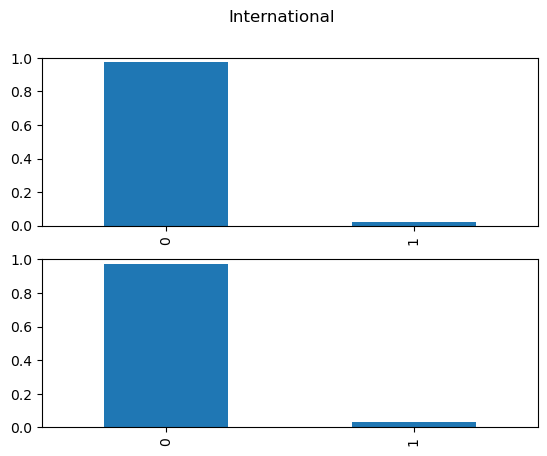

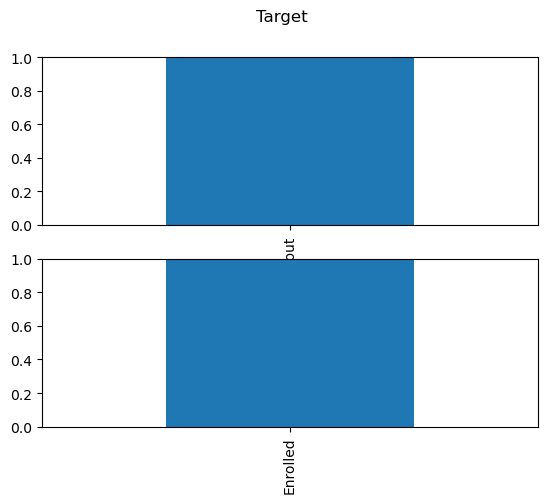

In [118]:
for col in dropout_categorial.columns:
  # print(pd.crosstab(bank[col], bank["Target"]))
  fig, axs = plt.subplots(2)
  fig.suptitle(col)
  dropout_categorial[col].value_counts(normalize=True).plot(kind="bar", ax=axs[0])
  enrolled_categorial[col].value_counts(normalize=True).plot(kind="bar", ax=axs[1])
  axs[0].set_ylim(0, 1)
  axs[1].set_ylim(0, 1)
  # fig.show()
# bank.select_dtypes(include="object").groupby(["Target"]).size()

Визуально самая большая разница у показателя Educational special needs

## 5. Визуализация зависимостей показателей.

### Два количественных показателя

<Axes: xlabel='Age at enrollment', ylabel='Admission grade'>

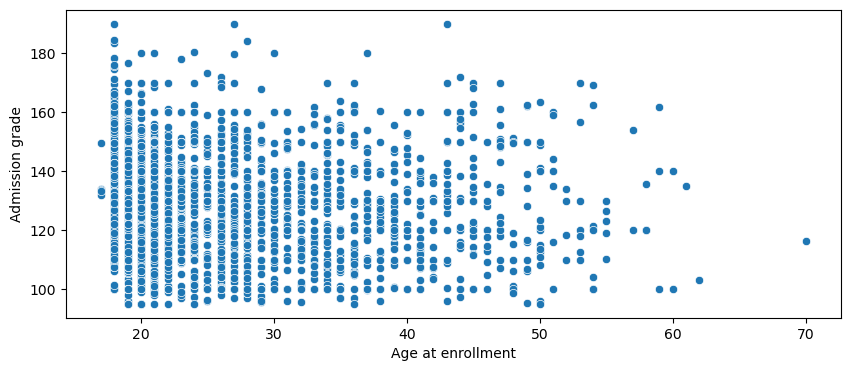

In [119]:
plt.figure(figsize=(10,4))
sns.scatterplot(x='Age at enrollment',y='Admission grade',data=bank)

### Два качественных показателя

<Axes: xlabel='Debtor', ylabel='count'>

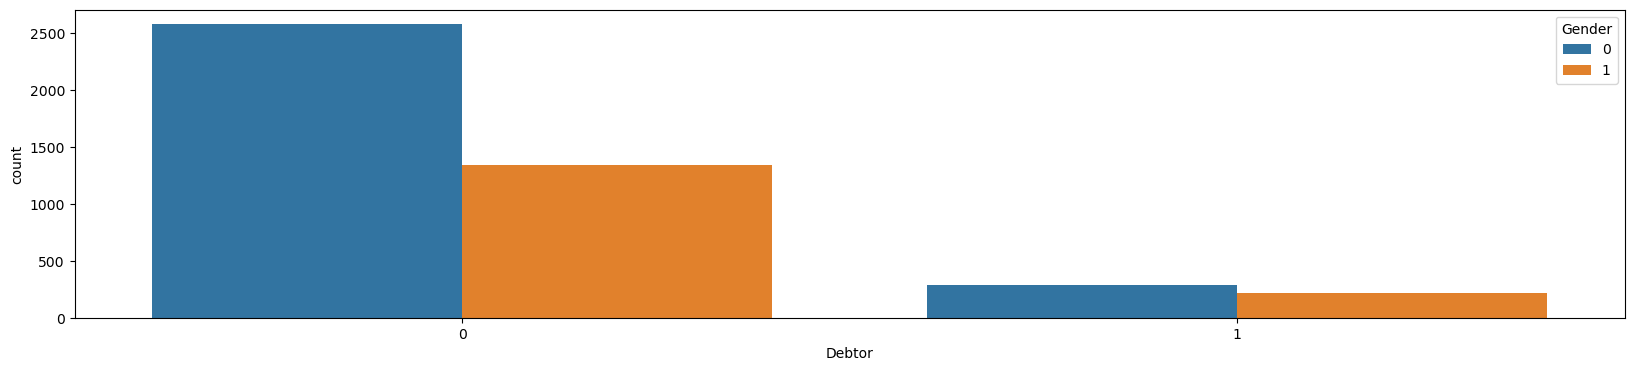

In [120]:
plt.figure(figsize=(20,4))
sns.countplot(x = "Debtor", hue = "Gender", data = bank)

Должников среди мужчин меньше.

### Количественный и качественный показатель

<Axes: xlabel='Age at enrollment', ylabel='Count'>

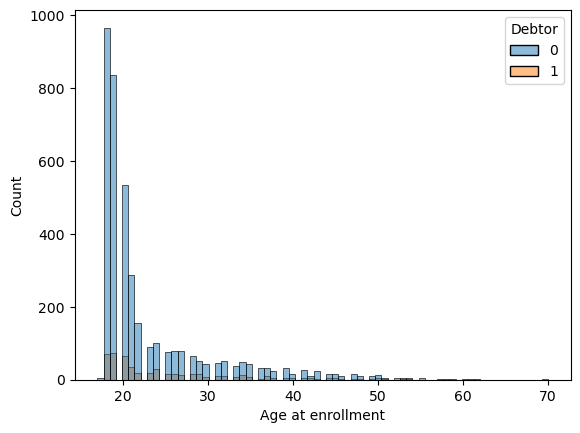

In [121]:
sns.histplot(x = "Age at enrollment", data = bank, hue = 'Debtor') 

## 6. Пропуски данных и аномальные выбросы. 

### Пропусков нет, согласно описанию датасета, это подтверждается:

In [122]:
bank.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

### Аномальные выбросы

<Axes: xlabel='Age at enrollment'>

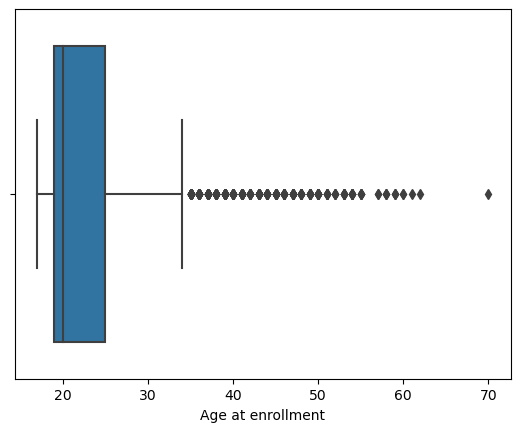

In [123]:
sns.boxplot(x = "Age at enrollment", data = bank)

In [124]:
len(bank[bank['Age at enrollment']>34])

441

График считает аномальными выбросами студентов, возраст которых выше 34 лет. Однако, можно предположить, что студентами могут быть и людям более старшего возраста возраста, хоть их количество и мало - 441, что составляет около 9,9%.

Аномальными выбросами точно можно считать строки, где продолжительность приоритет подачи заявления (атрибут Application order) равен 0 (первый выбор) или 9 (последний выбор).

In [125]:
bank[bank['Application order']==0]

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
2778,1,7,0,9003,1,3,130.0,1,1,37,...,8,12,22,12,13.214286,0,15.5,2.8,-4.06,Graduate


In [126]:
bank[bank['Application order']==9]

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
2629,1,39,9,9991,0,1,120.0,1,38,38,...,0,5,7,5,14.333333,0,10.8,1.4,1.74,Enrolled


В данном датасете таких строк всего две, по одной на каждую категорию.